# **Case Telecom X - Análise de Evasão de Clientes**

A evasão de clientes, conhecida como **churn**, é um dos principais desafios enfrentados pelas empresas de telecomunicações. Em um mercado altamente competitivo e com ofertas cada vez mais parecidas, reter clientes tornou-se tão ou mais importante do que atrair novos. A saída constante de usuários impacta diretamente a receita recorrente e pode indicar falhas em áreas como qualidade do serviço, atendimento, precificação ou experiência do cliente.


Compreender os motivos que levam os clientes a cancelar seus contratos e, principalmente, antecipar esse comportamento, é fundamental para a sustentabilidade do negócio. No entanto, identificar padrões de evasão nem sempre é simples. Em muitos casos, clientes que permanecem e os que desistem podem apresentar comportamentos semelhantes em diversos aspectos, o que exige análises mais aprofundadas e o uso de técnicas estatísticas e preditivas para distinguir sinais sutis de insatisfação.

**Ao aplicar análise de churn, empresas conseguem segmentar sua base de clientes, identificar perfis mais propensos à evasão e agir de forma proativa seja com melhorias no serviço, ofertas personalizadas ou campanhas de retenção mais estratégicas. Trata-se de uma aplicação direta da ciência de dados com impacto real no desempenho financeiro e na fidelização de clientes.**

Neste projeto, é explorada uma base de dados fictícia de uma empresa de telecom com o objetivo de realizar uma análise preditiva de churn. A proposta é aplicar técnicas de análise exploratória e modelagem para identificar padrões que ajudam a distinguir clientes propensos a cancelar seus serviços daqueles que tendem a permanecer ativos. Essa abordagem permite a simulação de estratégias reais de retenção, com base em insights extraídos diretamente dos dados.

## Business Understanding

A empresa Telecom X enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

## Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import json
import seaborn as sns


In [2]:
# Definir template e paleta padrão para todos os gráficos
pio.templates.default = "seaborn"  # outros: 'seaborn', 'ggplot2', 'simple_white', 'plotly_dark'
px.defaults.color_discrete_sequence = px.colors.qualitative.Safe
px.defaults.template = "seaborn"

In [3]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [4]:
df = pd.read_json(url)

In [5]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Normalização de colunas aninhadas

In [6]:
df_customer = pd.json_normalize(df['customer'])
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [7]:
df_phone = pd.json_normalize(df['phone'])
df_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [8]:
df_internet = pd.json_normalize(df['internet'])
df_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [9]:
df_account = pd.json_normalize(df['account'])
df_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [10]:
# Passo 2: Selecionar colunas de nível superior
df_top = df[['customerID', 'Churn']].reset_index(drop=True)


In [11]:
# Passo 3: Concatenar tudo em um único DataFrame
df_final = pd.concat([df_top, df_customer, df_phone, df_internet, df_account], axis=1)

In [12]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df_final.shape[0]}")
print(f"Colunas: {df_final.shape[1]}")

Entradas: 7267
Colunas: 21


## **Análise de Dados**

Esta seção fornece uma visão da estrutura e do significado dos dados que estão sendo analisados.


#### **Dicionário de Variáveis**


* `customerID`: número de identificação único de cada cliente

* `Churn`: se o cliente deixou ou não a empresa

* `gender`: gênero (masculino e feminino)

* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`: se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`: meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente


### Análise exploratória dos dados

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


É possível notar que:


*   Não há dados nulos
*   Os tipos de dados na maioria das colunas são object havendo 3 colunas numéricas. A coluna `Charges.Total` está configurada como object, mesmo sendo uma coluna que especifica os gastos totais dos clientes.



### Variáveis categóricas

In [14]:
# Criando gráfico para analisar a coluna 'Churn' (variável target)

px.histogram(df_final, x='Churn', text_auto=True, title='Distribuição da variável Churn')

In [15]:
# Verificando quais valores estão presentes na coluna
df_final['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [16]:
df_final['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


É possível perceber que há 224 valores vazios na coluna de Churn o que é diferente de valor nulo(NA) por isso não foram identificados antes. É preciso tratar primeiro estes dados na coluna para evitar erros.

In [17]:
# Analisando os valores vazios.
df_final[df_final['Churn'] == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


* Como é possível observar, os 224 valores vazios da variável 'churn' não apresenta um padrão especifico que possa explicar a razão dos valores vazios, sendo a única explicação, erro no preenchimento.

In [18]:
# Confirmando que não há valores nulos
(df_final.isnull().sum()/df_final.shape[0] * 100).round(2)

,0
customerID,0.0
Churn,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0


In [19]:
# Removendo linhas onde 'Churn' está vazio ou contém apenas espaços

df_final = df_final[df_final['Churn'].str.strip() != '']

In [20]:
# Proporção de CHURN e não CHURN
df_final['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


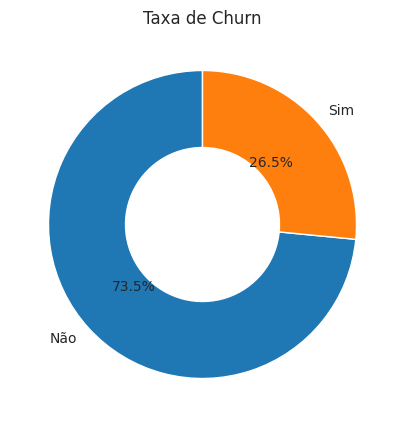

In [21]:
# Criando gráfico de rosca para melhor visualização da proporção de churn
sns.set_style("whitegrid")

plt.figure(figsize=(5,5))
churn_counts = df_final['Churn'].value_counts()
plt.pie(churn_counts, labels=['Não', 'Sim'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.title("Taxa de Churn")
plt.show()


É possível perceber o desbalanceamento da variável alvo com 26,5% dos eventos.

In [22]:
#verificando se há mais dados em branco
df_final.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [23]:
# Verificando coluna 'Churn' após tratamento

px.histogram(df_final, x='Churn', text_auto=True, title='Distribuição da variável Churn')

In [24]:
# Função para avaliar a frequencia da variavel alvo(churn) com relação as variáveis categóricas
def frequencias_churn_por_categoria(df, var_categorica, target='Churn', positive_class='Yes'):
    """
    Retorna uma tabela com total, churn, não churn e proporções (%) para cada categoria da variável categórica.
    """
    total_por_cat = df.groupby(var_categorica)[target].count()

    churn_por_cat = df[df[target] == positive_class].groupby(var_categorica)[target].count()
    nao_churn_por_cat = df[df[target] != positive_class].groupby(var_categorica)[target].count()

    prop_churn = (churn_por_cat / total_por_cat * 100).round(2)
    prop_nao_churn = (nao_churn_por_cat / total_por_cat * 100).round(2)

    resultado = pd.DataFrame({
        'Total': total_por_cat,
        'Churn': churn_por_cat,
        'Não Churn': nao_churn_por_cat,
        'Proporção Churn (%)': prop_churn,
        'Proporção Não Churn (%)': prop_nao_churn
    }).fillna(0).sort_values(by='Proporção Churn (%)', ascending=False)

    return resultado


In [25]:
# Gráfico para analisar a coluna 'gender'

px.histogram(df_final, x='gender', text_auto=True, color = 'Churn', barmode="group", title='Distribuição da variável churn com relação ao gênero')

In [26]:
print(frequencias_churn_por_categoria(df_final, 'gender'))

        Total  Churn  Não Churn  Proporção Churn (%)  Proporção Não Churn (%)
gender                                                                       
Female   3488    939       2549                26.92                    73.08
Male     3555    930       2625                26.16                    73.84


* É possivel perceber que parece haver uma distribuição semelhante de genero com relação a evasão(churn). O genero parece uma variável de pouca influência no churn

In [27]:
df_final['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
df_final['gender'].value_counts(normalize=True)

,proportion
gender,
Male,0.504756
Female,0.495244


In [29]:
# Gráfico para analisar a coluna 'SeniorCitizen' possui 65 anos ou mais? 0 = não, 1 = sim

px.histogram(df_final, x='SeniorCitizen', text_auto=True, color = 'Churn', barmode="group",title= 'Distribuição do Churn entre Clientes com e sem 65 anos ou mais' )

In [30]:
print(frequencias_churn_por_categoria(df_final, 'SeniorCitizen'))

               Total  Churn  Não Churn  Proporção Churn (%)  \
SeniorCitizen                                                 
1               1142    476        666                41.68   
0               5901   1393       4508                23.61   

               Proporção Não Churn (%)  
SeniorCitizen                           
1                                58.32  
0                                76.39  


* Clientes classificados como SeniorCitizen (65 anos ou mais) apresentam taxa de churn de 41,68% (taxa do grupo), quase o dobro da taxa de churn de clientes do grupo não idosos (23,61%)

In [31]:
df_final['SeniorCitizen'].value_counts(normalize=True)

,proportion
SeniorCitizen,
0,0.837853
1,0.162147


In [32]:
# Gráfico para analisar a coluna 'Partner' (Possui parceiro)

px.histogram(df_final, x='Partner', text_auto=True, color = 'Churn', barmode="group" ,title='Distribuição do churn entre clientes que possuem ou não parceiros')

In [33]:
print(frequencias_churn_por_categoria(df_final, 'Partner'))

         Total  Churn  Não Churn  Proporção Churn (%)  Proporção Não Churn (%)
Partner                                                                       
No        3641   1200       2441                32.96                    67.04
Yes       3402    669       2733                19.66                    80.34


Dos clientes que possuem parceiros:

* 80,34% não churn
* 19,66 são churn

Dos clientes que não possuem parceiros:

* 67,04% não churn
* 32,96 são churn

Observa-se que a proporção de churn entre clientes que não possuem parceiros é maior, o que pode indicar que clientes casados ou com parceiros podem ser mais estáveis em parmanecer com o serviço.


In [34]:
df_final['Partner'].value_counts(normalize=True)

,proportion
Partner,
No,0.516967
Yes,0.483033


In [35]:
# Gráfico para analisar a coluna 'Dependents' (Possui dependentes:

px.histogram(df_final, x='Dependents', text_auto=True, color = 'Churn', barmode="group", title='Distribuição do churn entre clientes que possuem ou não dependentes')

In [36]:
print(frequencias_churn_por_categoria(df_final, 'Dependents'))

            Total  Churn  Não Churn  Proporção Churn (%)  \
Dependents                                                 
No           4933   1543       3390                31.28   
Yes          2110    326       1784                15.45   

            Proporção Não Churn (%)  
Dependents                           
No                            68.72  
Yes                           84.55  


* Observa-se aqui um padrão semelhante a variável 'partner', clientes que possuem dependentes possuem a proporção de churn menor do que os que não possuem dependentes.

In [37]:
df_final['Dependents'].value_counts(normalize=True)

,proportion
Dependents,
No,0.700412
Yes,0.299588


In [38]:
# Gráfico para analisar a coluna 'PhoneService'
px.histogram(df_final, x='PhoneService', text_auto=True, color = 'Churn', barmode="group")

In [39]:
print(frequencias_churn_por_categoria(df_final, 'PhoneService'))

              Total  Churn  Não Churn  Proporção Churn (%)  \
PhoneService                                                 
Yes            6361   1699       4662                26.71   
No              682    170        512                24.93   

              Proporção Não Churn (%)  
PhoneService                           
Yes                             73.29  
No                              75.07  


In [40]:
# Gráfico para analisar a coluna 'MultipleLines'
px.histogram(df_final, x='MultipleLines', text_auto=True, color = 'Churn', barmode="group")

In [41]:
print(frequencias_churn_por_categoria(df_final,'MultipleLines'))

                  Total  Churn  Não Churn  Proporção Churn (%)  \
MultipleLines                                                    
Yes                2971    850       2121                28.61   
No                 3390    849       2541                25.04   
No phone service    682    170        512                24.93   

                  Proporção Não Churn (%)  
MultipleLines                              
Yes                                 71.39  
No                                  74.96  
No phone service                    75.07  


In [42]:
df_final['MultipleLines'].value_counts(normalize=True)

,proportion
MultipleLines,
No,0.481329
Yes,0.421837
No phone service,0.096834


In [43]:
# Gráfico para analisar a coluna 'InternetService'

px.histogram(df_final, x='InternetService', text_auto=True, color = 'Churn', barmode="group", title='Distribuição de churn por tipo de serviço')

In [44]:
print(frequencias_churn_por_categoria(df_final,'InternetService'))

                 Total  Churn  Não Churn  Proporção Churn (%)  \
InternetService                                                 
Fiber optic       3096   1297       1799                41.89   
DSL               2421    459       1962                18.96   
No                1526    113       1413                 7.40   

                 Proporção Não Churn (%)  
InternetService                           
Fiber optic                        58.11  
DSL                                81.04  
No                                 92.60  


* É possível perceber que há mais churn entre clientes que possuem o serviço de fibra ótica. A combinação de custo alto e qualidade do serviço pode estar afetando negativamente a satisfação dos clientes e contribuido para a evasão destes clientes.

In [45]:
## Cobrança mensal por tipo de serviço

df_final.groupby('InternetService')['Charges.Monthly'].agg(['sum', 'mean'])

,sum,mean
InternetService,,
DSL,140665.35,58.102169
Fiber optic,283284.40,91.500129
No,32166.85,21.079194


Os gastos mensais são maiores para clientes do serviço 'fibra ótica' como já havia mencionado anteriormente, maiores gastos e algum gap nesse serviço pode estar contribuindo para um maior churn nesse tipo de serviço.

In [46]:
df_final['InternetService'].value_counts(normalize=True)

,proportion
InternetService,
Fiber optic,0.439585
DSL,0.343746
No,0.216669


In [47]:
# Gráfico para analisar a coluna 'OnlineSecurity' (assinatura adicional de segurança online?)

px.histogram(df_final, x='OnlineSecurity', text_auto=True, color = 'Churn', barmode="group")

In [48]:
print(frequencias_churn_por_categoria(df_final,'OnlineSecurity'))

                     Total  Churn  Não Churn  Proporção Churn (%)  \
OnlineSecurity                                                      
No                    3498   1461       2037                41.77   
Yes                   2019    295       1724                14.61   
No internet service   1526    113       1413                 7.40   

                     Proporção Não Churn (%)  
OnlineSecurity                                
No                                     58.23  
Yes                                    85.39  
No internet service                    92.60  


In [49]:
df_final['OnlineSecurity'].value_counts(normalize=True)

,proportion
OnlineSecurity,
No,0.496663
Yes,0.286668
No internet service,0.216669


In [50]:
# Gráfico para analisar a coluna 'OnlineBackup'

px.histogram(df_final, x='OnlineBackup', text_auto=True, color = 'Churn', barmode="group")

In [51]:
print(frequencias_churn_por_categoria(df_final,'OnlineBackup'))

                     Total  Churn  Não Churn  Proporção Churn (%)  \
OnlineBackup                                                        
No                    3088   1233       1855                39.93   
Yes                   2429    523       1906                21.53   
No internet service   1526    113       1413                 7.40   

                     Proporção Não Churn (%)  
OnlineBackup                                  
No                                     60.07  
Yes                                    78.47  
No internet service                    92.60  


In [52]:
df_final['OnlineBackup'].value_counts(normalize=True)

,proportion
OnlineBackup,
No,0.438450
Yes,0.344881
No internet service,0.216669


In [53]:
# Gráfico para analisar a coluna 'DeviceProtection'

px.histogram(df_final, x='DeviceProtection', text_auto=True, color = 'Churn', barmode="group")

In [54]:
print(frequencias_churn_por_categoria(df_final,'DeviceProtection'))

                     Total  Churn  Não Churn  Proporção Churn (%)  \
DeviceProtection                                                    
No                    3095   1211       1884                39.13   
Yes                   2422    545       1877                22.50   
No internet service   1526    113       1413                 7.40   

                     Proporção Não Churn (%)  
DeviceProtection                              
No                                     60.87  
Yes                                    77.50  
No internet service                    92.60  


In [55]:
df_final['DeviceProtection'].value_counts(normalize=True)

,proportion
DeviceProtection,
No,0.439443
Yes,0.343888
No internet service,0.216669


In [56]:
# Gráfico para analisar a coluna 'TechSupport'

px.histogram(df_final, x='TechSupport', text_auto=True, color = 'Churn', barmode="group")

In [57]:
print(frequencias_churn_por_categoria(df_final,'TechSupport'))

                     Total  Churn  Não Churn  Proporção Churn (%)  \
TechSupport                                                         
No                    3473   1446       2027                41.64   
Yes                   2044    310       1734                15.17   
No internet service   1526    113       1413                 7.40   

                     Proporção Não Churn (%)  
TechSupport                                   
No                                     58.36  
Yes                                    84.83  
No internet service                    92.60  


In [58]:
df_final['TechSupport'].value_counts(normalize=True)

,proportion
TechSupport,
No,0.493114
Yes,0.290217
No internet service,0.216669


In [59]:
# Gráfico para analisar a coluna 'StreamingTV'

px.histogram(df_final, x='StreamingTV', text_auto=True, color = 'Churn', barmode="group")

In [60]:
print(frequencias_churn_por_categoria(df_final,'StreamingTV'))

                     Total  Churn  Não Churn  Proporção Churn (%)  \
StreamingTV                                                         
No                    2810    942       1868                33.52   
Yes                   2707    814       1893                30.07   
No internet service   1526    113       1413                 7.40   

                     Proporção Não Churn (%)  
StreamingTV                                   
No                                     66.48  
Yes                                    69.93  
No internet service                    92.60  


In [61]:
df_final['StreamingTV'].value_counts(normalize=True)

,proportion
StreamingTV,
No,0.398978
Yes,0.384353
No internet service,0.216669


In [62]:
# Gráfico para analisar a coluna 'StreamingMovies'

px.histogram(df_final, x='StreamingMovies', text_auto=True, color = 'Churn', barmode="group")

In [63]:
print(frequencias_churn_por_categoria(df_final,'StreamingMovies'))

                     Total  Churn  Não Churn  Proporção Churn (%)  \
StreamingMovies                                                     
No                    2785    938       1847                33.68   
Yes                   2732    818       1914                29.94   
No internet service   1526    113       1413                 7.40   

                     Proporção Não Churn (%)  
StreamingMovies                               
No                                     66.32  
Yes                                    70.06  
No internet service                    92.60  


In [64]:
df_final['StreamingMovies'].value_counts(normalize=True)

,proportion
StreamingMovies,
No,0.395428
Yes,0.387903
No internet service,0.216669


In [65]:
# Gráfico para analisar a coluna 'Contract'

px.histogram(df_final, x='Contract', text_auto=True, color = 'Churn', barmode="group", title='Distribuição de churn por tipo de contrato')

In [66]:
print(frequencias_churn_por_categoria(df_final,'Contract'))

                Total  Churn  Não Churn  Proporção Churn (%)  \
Contract                                                       
Month-to-month   3875   1655       2220                42.71   
One year         1473    166       1307                11.27   
Two year         1695     48       1647                 2.83   

                Proporção Não Churn (%)  
Contract                                 
Month-to-month                    57.29  
One year                          88.73  
Two year                          97.17  


* Contratos mensais têm mais churn do que anuais.

In [67]:
df_final['Contract'].value_counts(normalize=True)

,proportion
Contract,
Month-to-month,0.550192
Two year,0.240664
One year,0.209144


In [68]:
# Gráfico para analisar a coluna 'PaperlessBilling'

px.histogram(df_final, x='PaperlessBilling', text_auto=True, color = 'Churn', barmode="group")

In [69]:
print(frequencias_churn_por_categoria(df_final,'PaperlessBilling'))

                  Total  Churn  Não Churn  Proporção Churn (%)  \
PaperlessBilling                                                 
Yes                4171   1400       2771                33.57   
No                 2872    469       2403                16.33   

                  Proporção Não Churn (%)  
PaperlessBilling                           
Yes                                 66.43  
No                                  83.67  


In [70]:
df_final['PaperlessBilling'].value_counts(normalize=True)

,proportion
PaperlessBilling,
Yes,0.592219
No,0.407781


In [71]:
# Gráfico para analisar a coluna 'PaymentMethod'

px.histogram(df_final, x='PaymentMethod', text_auto=True, color = 'Churn', barmode="group")

In [72]:
print(frequencias_churn_por_categoria(df_final,'PaymentMethod'))

                           Total  Churn  Não Churn  Proporção Churn (%)  \
PaymentMethod                                                             
Electronic check            2365   1071       1294                45.29   
Mailed check                1612    308       1304                19.11   
Bank transfer (automatic)   1544    258       1286                16.71   
Credit card (automatic)     1522    232       1290                15.24   

                           Proporção Não Churn (%)  
PaymentMethod                                       
Electronic check                             54.71  
Mailed check                                 80.89  
Bank transfer (automatic)                    83.29  
Credit card (automatic)                      84.76  


### Variáveis numéricas

* Antes de seguirmos analisando as variáveis numéricas, será necessário tratar o dtype de algumas como foi possível observar anteriormente.

In [73]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [74]:
# Substitui strings vazias ou espaços por NaN
df_final['Charges.Total'] = df_final['Charges.Total'].replace(r'^\s*$', pd.NA, regex=True)

In [75]:
df_final['Charges.Total'] = df_final['Charges.Total'].fillna('0.0')

In [76]:
df_final['Charges.Total'] = df_final['Charges.Total'].astype(np.float64)

In [77]:
# Confirmando dtype da coluna após alteração
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [78]:
df_final['Charges.Total'].isna().sum()

np.int64(0)

In [79]:
# Estatísticas das variaveis numéricas
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [80]:
# Criando gráfico para analisar a distribuição da variável 'tenure'
px.box(df_final, x = 'tenure', color = 'Churn', title='Distribuição de Churn por Tempo de Contrato')

In [81]:
df_final.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


Clientes que não deram churn

  * Tempo médio de permanência: 37,57 meses

  * Mediana: 38 meses

  * Distribuição concentrada entre 15 e 61 meses (intervalo interquartil)

  * Desvio padrão de 24,11, indicando bastante variação no tempo de permanência

Clientes que deram churn

  * Tempo médio de permanência: 17,98 meses (distribuição assimétrica a direita com alguns outliers)

  * Mediana: 10 meses

  * Distribuição concentrada entre 2 e 29 meses (intervalo interquartil)

  * Desvio padrão de 19,53, um pouco menor que o grupo “No”

Os clientes que cancelam têm, em média, cerca de metade do tempo de permanência em relação aos que não cancelam.


Isso sugere que clientes mais novos na base são mais propensos a churn que é um padrão que costuma aparecer em bases de telecom, onde o churn é mais alto nos primeiros meses.

In [82]:
# Criando gráfico para analisar a distribuição da variável 'Charges.Monthly'
px.box(df_final, x = 'Charges.Monthly', color = 'Churn')

In [83]:
df_final.groupby('Churn')['Charges.Monthly'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


Clientes que não deram churn (No)

  * Média: 61,27

  * Mediana: 64,43

  * Distribuição bem espalhada (desvio padrão ≈ 31,09)

  * Quartis indicam dois grupos distintos: um grupo com cobranças baixas (25% ≤ 25,10) e outro com valores mais altos

Clientes que deram churn (Yes)

  * Média: 74,44 (≈ 13 reais a mais que o grupo "No")

  * Mediana: 79,65

  * Menor desvio padrão (≈ 24,66), ou seja, mais concentrado

  * Grande parte já acima de 56 reais

### Criando coluna **'DailyCharges'**

In [84]:
# Criando coluna DailyCharges a partir de Charges.Monthly
df_final['DailyCharges'] = (df_final['Charges.Monthly'] / 30.437).round(2)

# Verificando o resultado
df_final[['Charges.Monthly', 'DailyCharges']].head()


,Charges.Monthly,DailyCharges
0,65.6,2.16
1,59.9,1.97
2,73.9,2.43
3,98.0,3.22
4,83.9,2.76


In [85]:
# Criando gráfico para analisar a distribuição da variável 'DailyCharges'
px.box(df_final, x = 'DailyCharges', color = 'Churn',title='Distribuição de DailyCharges por Churn')


In [86]:
df_final.groupby('Churn')['DailyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2.012866,1.021427,0.60,0.82,2.12,2.90,3.90
Yes,1869.0,2.445671,0.810424,0.62,1.84,2.62,3.09,3.89


Clientes que não deram churn (No)

  * Média: 2,01 por dia

  * Mediana: 2,12

  * Distribuição mais espalhada (std ≈ 1,02)

  * Quartis mostram dois grupos distintos: um de valores baixos (≤ 0,82) e outro acima de 2,9

Clientes que deram churn (Yes)

  * Média: 2,45 por dia (≈ 22% mais que o grupo “No”)

  * Mediana: 2,62

  * Distribuição mais concentrada (std ≈ 0,81)


Clientes que cancelam pagam, em média, mais por dia do que clientes que permanecem.

Assim como no Charges.Monthly, isso pode estar associado a planos mais caros, pacotes adicionais ou clientes novos que entraram em planos premium mas saíram cedo.

In [87]:
# Criando gráfico para analisar a distribuição da variável 'Charges.Total'
px.box(df_final, x = 'Charges.Total', color = 'Churn')

In [88]:
df_final.groupby('Churn')['Charges.Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


Clientes que não deram churn (No)

  * Média: R$ 2.549,91 acumulados

  * Mediana: R$ 1.679,53

  * Grande dispersão (std ≈ 2.329,95)

  * Muitos clientes com valores altos (75% > 4.262,85) → coerente com clientes  antigos na base.

Clientes que deram churn (Yes)

  * Média: R$ 1.531,80 acumulados (≈ 40% menor que o grupo “No”)

  * Mediana: R$ 703,55

  * Distribuição concentrada em valores baixos, o que reforça que clientes que saem tendem a permanecer pouco tempo.


Essa diferença está diretamente ligada ao tenure: clientes que ficam mais tempo acumulam mais faturamento.

Por isso, Charges.Total e tenure provavelmente estarão **altamente correlacionados** este é um ponto para verificar antes do modelo, para evitar redundância.

### Padronização das variáveis binárias

Para evitar que posteriormente tenhamos problemas no modelo, será feita a padronização das variáveis que contem 'No internet service'. Essas respostas serão transformadas em 'No'.

In [89]:
# Detectar colunas que contêm 'No internet service'
cols_with_no_service = [col for col in df_final.columns if df_final[col].eq('No internet service').any()]
print("Colunas a serem atualizadas:", cols_with_no_service)

# Contagem antes da substituição
for col in cols_with_no_service:
    print(f"{col} - antes: {(df_final[col] == 'No internet service').sum()} ocorrências")

# Substituir apenas nessas colunas (modo seguro)
df_final[cols_with_no_service] = df_final[cols_with_no_service].replace('No internet service', 'No')

# Verificar depois
for col in cols_with_no_service:
    print(f"{col} - depois: 'No internet service' = {(df_final[col] == 'No internet service').sum()}, 'No' = {(df_final[col] == 'No').sum()}")


Colunas a serem atualizadas: ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
OnlineSecurity - antes: 1526 ocorrências
OnlineBackup - antes: 1526 ocorrências
DeviceProtection - antes: 1526 ocorrências
TechSupport - antes: 1526 ocorrências
StreamingTV - antes: 1526 ocorrências
StreamingMovies - antes: 1526 ocorrências
OnlineSecurity - depois: 'No internet service' = 0, 'No' = 5024
OnlineBackup - depois: 'No internet service' = 0, 'No' = 4614
DeviceProtection - depois: 'No internet service' = 0, 'No' = 4621
TechSupport - depois: 'No internet service' = 0, 'No' = 4999
StreamingTV - depois: 'No internet service' = 0, 'No' = 4336
StreamingMovies - depois: 'No internet service' = 0, 'No' = 4311


In [90]:
df_final.OnlineBackup.unique()

array(['Yes', 'No'], dtype=object)

### Agora vamos ver como as variáveis numéricas estão correlacionadas.

Para analisar correlação numérica com Churn, precisamos transformar o Churn em variável numérica.

In [91]:
df_cleaned = df_final.copy()
df_cleaned['Churn'] = df_cleaned['Churn'].map({'No': 0, 'Yes': 1})

In [92]:
# Selecionar as variáveis numéricas para análise
variaveis_numericas = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'DailyCharges', 'Charges.Total']


In [93]:
# Calcular a matriz de correlação
corr = df_cleaned[variaveis_numericas + ['Churn']].corr()

# Mostrar correlações com Churn_num
print(corr['Churn'].sort_values(ascending=False))


Churn              1.000000
Charges.Monthly    0.193356
DailyCharges       0.193331
SeniorCitizen      0.150889
Charges.Total     -0.198324
tenure            -0.352229
Name: Churn, dtype: float64


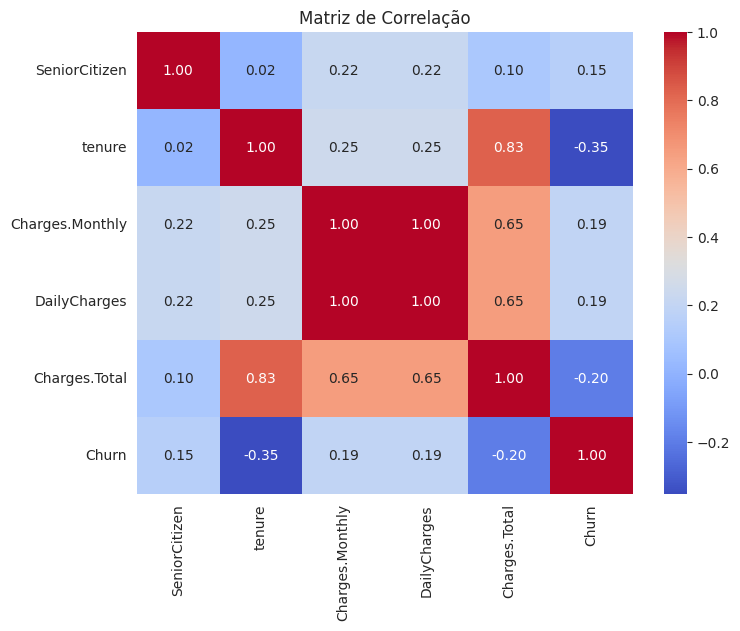

In [94]:
# Visualizar com heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

**Correlações fortes entre variáveis explicativas**

* tenure e Charges.Total: 0.826 — alta correlação positiva, faz sentido porque o total acumulado depende do tempo na base.

* Charges.Monthly e DailyCharges: 1 — praticamente a mesma variável e escalas diferentes.

* Charges.Monthly e Charges.Total: 0.651 — razoável correlação positiva.




**Correlação com Churn_num (target)**

| Variável          | Correlação | Interpretação                                                        |
| ----------------- | ---------- | -------------------------------------------------------------------- |
| `tenure`          | -0.352     | Moderada correlação negativa — mais tempo, menos churn (fator forte) |
| `Charges.Monthly` | +0.193     | Correlação positiva fraca — planos caros têm mais churn              |
| `DailyCharges`    | +0.193     | Mesmo comportamento que Charges.Monthly                              |
| `Charges.Total`   | -0.198     | Correlação negativa — mais receita acumulada, menos churn            |
| `SeniorCitizen`   | +0.151     | Idosos têm ligeira tendência maior a churn                           |


Analisando a matriz de correlação com relação a variável alvo (**Churn**), é possível perceber que a variável (**tenure**) possui a maior correlação negativa encontrada que é de ≈-35 ou seja, quanto maior o tempo de contrato do cliente, menor será a chance de cancelamento. O que faz muito sentido poís quanto maior a lealdade do cliente construida ao longo do tempo, menor é a desistência no geral.


Em custo total ou (**Charges.Total**) também observamos uma correlação negativa em relação a variável alvo de ≈-20 ou seja, quanto maior os gastos totais dos clientes, menor o cancelamento. Isso também é um pouco óbvio visto que essa variável contém o total gasto por todos os clientes durante todo seu tempo de contrato, dessa forma clientes com mais tempo de contrato(Não churn) terão gastos totais maiores em relação aos clientes que cancelaram o contrato.


Com relação a correlação entre as variáveis independentes, (**Charges.Monthly**) e (**Charges.Total**) possuem correlação positiva quase perfeita ≈99 o que indica que são praticamente a mesma coisa por isso para evitar a multicolinearidade no modelo de machine learning, seria interessante avaliar neste caso, a exclusão de uma dessas variáveis para reduzir a multicolinearidade.



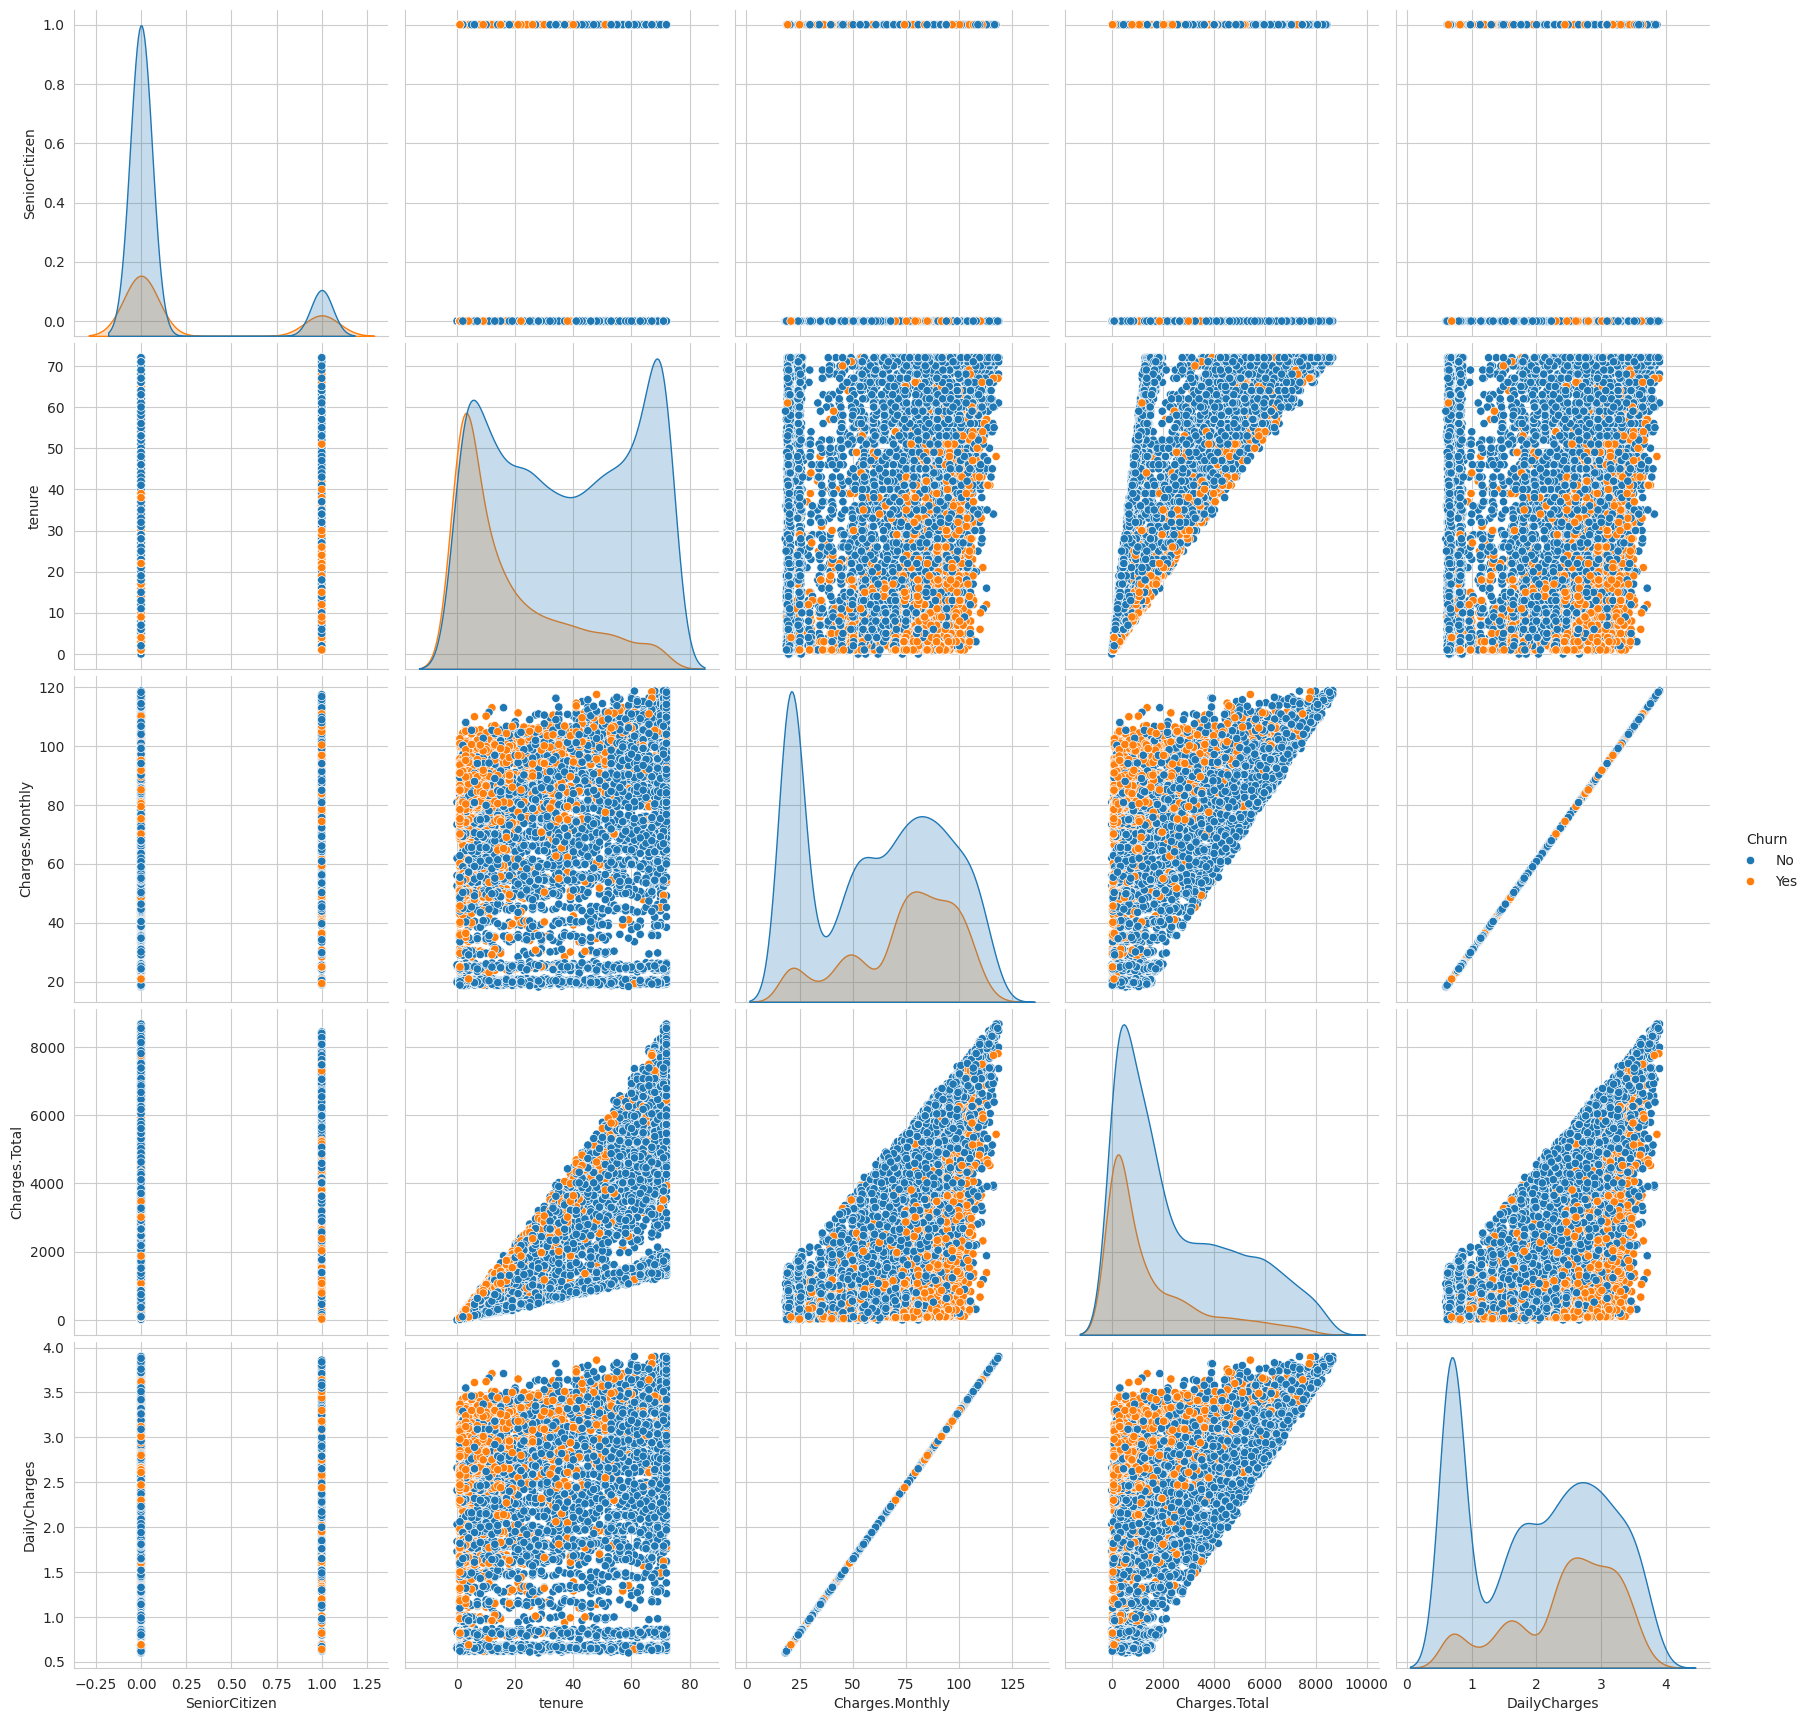

In [95]:
# Relação entre variáveis
sns.pairplot(df_final, hue='Churn', height=3.5)

# mostra o gráfico usando a função show() da matplotlib
plt.show()

### Testes estatísticos para medir a relação entre variáveis categóricas

Como reforço não obrigatório (neste caso), podemos aplicar alguns testes estatísticos para medir a relação entre as variáveis categóricas. Sua importância reside na capacidade de identificar associações significativas entre variáveis e avaliar o ajuste dos dados observados com um modelo teórico. O poder do teste qui-quadrado ou teste V de Creamer está relacionado ao tamanho da amostra e à força da associação entre as variáveis.

O **p-valor** é uma medida estatística que indica a probabilidade de obter resultados iguais ou mais extremos que os observados em um estudo, assumindo que a hipótese nula (de que não há efeito ou diferença) é verdadeira. Em termos mais simples, ele ajuda a decidir se os resultados de um experimento são estatisticamente significativos.
Interpretação do p-valor:

    P-valor baixo (geralmente ≤ 0,05):
    Associação estatisticamente significativa (p < 0.05)
    P-valor alto (geralmente > 0,05):
    Indica que os resultados observados são consistentes com a hipótese nula, ou seja, podem ter ocorrido por acaso com uma probabilidade relativamente alta

In [96]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(confusion_matrix):
    """Calcula o V de Cramer para uma tabela de contingência."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

def chi2_cramersv_churn(df, target='Churn'):
    resultados = []

    # Selecionar apenas colunas categóricas exceto o target
    colunas_cat = df.select_dtypes(include=['object', 'category', 'bool']).columns
    colunas_cat = [c for c in colunas_cat if c != target and c.lower() != 'customerid']

    for col in colunas_cat:
        cont_table = pd.crosstab(df[col], df[target])
        chi2, p, _, _ = chi2_contingency(cont_table)
        v_cramer = cramers_v(cont_table)

        resultados.append({
            'Variável': col,
            'Qui-quadrado': chi2,
            'p-valor': p,
            'V de Cramer': v_cramer
        })

    # Retorna ordenado pela força da relação (V de Cramer)
    return pd.DataFrame(resultados).sort_values(by='V de Cramer', ascending=False)

# Exemplo de uso:
resultados_churn = chi2_cramersv_churn(df_final, target='Churn')
print(resultados_churn)


            Variável  Qui-quadrado        p-valor  V de Cramer
12          Contract   1184.596572  5.863038e-258     0.409798
5    InternetService    732.309590  9.571788e-160     0.322037
14     PaymentMethod    648.142327  3.682355e-140     0.302677
13  PaperlessBilling    258.277649   4.073355e-58     0.191141
6     OnlineSecurity    205.633104   1.232098e-46     0.170467
9        TechSupport    190.166842   2.923567e-43     0.163898
2         Dependents    189.129249   4.924922e-43     0.163448
1            Partner    158.733382   2.139911e-36     0.149663
7       OnlineBackup     47.260854   6.214093e-12     0.081051
8   DeviceProtection     30.513395   3.315693e-08     0.064738
10       StreamingTV     27.862522   1.302484e-07     0.061762
11   StreamingMovies     26.251336   2.997474e-07     0.059882
4      MultipleLines     11.330441   3.464383e-03     0.036400
3       PhoneService      0.915033   3.387825e-01     0.000000
0             gender      0.484083   4.865787e-01     0

A tabela mostra para cada variável categórica:

* Qui-quadrado → mede a discrepância entre as frequências observadas e as esperadas.

* p-valor → indica se a associação com o Churn é estatisticamente significativa (quanto menor, mais forte a evidência de associação).

* V de Cramér → mede a força da associação (0 a 1), sendo:

  * 0.00 a 0.10 → associação fraca ou desprezível

  * 0.10 a 0.30 → associação moderada

  * 0.30 → associação forte

Podemos observar com os resultados dos testes Qui-quadrado e V de Cramér as relações estatísticamente significativas( onde o p < 0.05), além da força das relaçoes de algumas variáveis com relação ao churn.

Por exemplo, variáveis como **Contract**, **InternetService**, **PaymentMethod**, **PaperlessBilling**, **OnlineSecurity**, **TechSupport**, **Dependents**, **Partner** mostram forte evidência de associação com o churn de clientes. Algumas dessas associações já haviamos percebido anteriormente como é o caso da variável **Contract** onde clientes que possuem contratos mensais tendem a abandonar mais o serviço comparado a clientes cujo o contrato é anual ou bienal. Os resultados de V de Cramér reforçam a interpretação dos resultados do teste Qui-quadrado.

Em resumo temos:

Associações mais fortes com o Churn

* **Contract (V=0.41)** → Forte associação; o tipo de contrato está muito relacionado à probabilidade de churn. Contratos "Month-to-month" tendem a ter muito mais cancelamentos que contratos anuais ou bienais.

* **InternetService (V=0.32)** → Forte associação; clientes com internet via fibra ótica cancelam mais do que DSL ou sem internet.

* **PaymentMethod (V=0.30)** → Forte associação; pagamentos automáticos via débito ou crédito têm menor churn que boletos, por exemplo.

Associações moderadas

* **PaperlessBilling (V=0.19)**, **OnlineSecurity (V=0.17)**, **TechSupport (V=0.16)**, **Dependents (V=0.16)**, **Partner (V=0.15)**.
Esses fatores têm impacto, mas menor que os três principais. Ainda assim mostram perfis de clientes mais propensos a churn.

Associações fracas

* **OnlineBackup, DeviceProtection, StreamingTV, StreamingMovies** → V entre 0.06 e 0.08; pequenas diferenças na taxa de churn.

* **MultipleLines (V=0.03)** → quase irrelevante.

* **PhoneService** e **gender** → nenhuma associação (V≈0 e p-valor alto).


### Conclusão geral

* O churn está fortemente relacionado ao tipo de contrato, tipo de serviço de internet e método de pagamento.

* Serviços adicionais de segurança (OnlineSecurity, TechSupport) reduzem o churn, mas o efeito é moderado.

* Variáveis demográficas simples como gênero ou ter telefone não influenciasignificativamente.

Essas conclusões são úteis para:

* Seleção de variáveis para o modelo de Machine Learning.

* Estratégias de retenção — foco em clientes com contratos mensais, internet via fibra e que usam boleto.

---

## **Relatório Final**

#### **Introdução**

O objetivo desta análise foi compreender os padrões e fatores associados à evasão de clientes (Churn) em uma base de dados de telecomunicações da empresa fictícia Telecom X.

O Churn representa clientes que encerraram o contrato com a empresa, sendo um indicador crucial para o desempenho do negócio.
Entender os motivos por trás dessa evasão é essencial para criar estratégias de retenção mais eficazes, reduzir perdas e aumentar a satisfação dos clientes.

Nesta primeira etapa, foi realizada a **Exploração** e **Limpeza dos Dados**, preparando o dataset para aplicações de Machine Learning na próxima fase do projeto.

#### **Limpeza e Tratamento de Dados**

Foram seguidos os seguintes passos:

* Importação dos dados via api e armazenamento via JSON e posteriormente foi efetuada a normalização dos dados usando `pd.json_normalize`.

* Análise inicial das colunas para verificar tipo de dados, valores ausentes e inconsistências.

* Tratamento de valores ausentes:
 * remoção de 224 registros em branco da coluna `Churn`
 * transformação da categoria 'No internet service' para 'No' nas colunas: `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`


#### Análise Exploratória de Dados (EDA)

Foram explorados os dados de forma descritiva e visual, com destaque para:

-Distribuição do Churn

* Foi identificado que aproximadamente 26% dos clientes cancelaram o serviço contra aproximadamente 74% de não churn evidenciando que os dados estão desbalanceados.

-Perfil Demográfico

* Gênero: O cancelamento apresentou distribuição semelhante entre homens e mulheres, sem grandes variações.

* Idade: Clientes mais velhos apresentaram taxa de evasão maior dentro desse grupo mas são apenas 16% do total da base de clientes.  

-Serviços Contratados

* Clientes com **apenas** serviço de telefone apresentaram maior taxa de churn. O teste Qui-quadrado confirmou associação significativa entre tipo de serviço e churn.

* Planos de internet por fibra óptica apresentaram evasão mais alta que DSL, diferença também confirmada estatisticamente (Qui-quadrado).

-Fatores Contratuais

* Tipo de contrato: Contratos mensais tiveram churn significativamente mais alto. Diferença confirmada com Qui-quadrado e V de Cramér demonstrando uma associação forte (0.409798) com a variável alvo.

* Forma de pagamento: Débito automático e cartão apresentaram menor evasão que boleto, associação validada estatisticamente (Qui-quadrado).

-Análise das Correlações

* A matriz de correlação mostrou que variáveis financeiras como Charges.Monthly e a nova métrica derivada DailyCharges apresentam correlação positiva forte entre si sugerindo redundância.

* A variável tenure (tempo de permanência do cliente) evidenciou correlação negativa forte (-0.35) com churn, indicando que clientes com maior tempo na base apresentam menor risco de evasão.



#### **Conclusões e Insights**

* O tempo de relacionamento(clientes novos) é o principal fator associados ao churn.

* Clientes com serviços limitados (somente telefone ou internet de baixa velocidade) apresentam menor fidelização.

* A adesão a pacotes de serviços combinados e contratos mais longos tende a reduzir evasão.

* O valor mensal pago é mais alto para clientes que cancelam, sugerindo sensibilidade ao preço.

* Contratos do tipo mensal apresentam maior churn em relação a contratos anuais e bienais que tem maior retenção.

#### **Recomendações**

Com base na análise, recomenda-se:

1. Incentivar contratos anuais/bienais oferecendo descontos, serviços trial e benefícios adicionais para clientes novos.

2. Oferecer pacotes combinados, segurança e suporte de serviços a preços competitivos para clientes com serviços isolados.

3. Revisar políticas de preços para segmentos mais sensíveis, especialmente usuários de fibra óptica com alto valor mensal.

4. Monitorar clientes em início de contrato (tempo de contrato < 12 meses), oferecendo benefícios já nos primeiros meses para aumentar retenção e implementar campanhas de retenção.

In [97]:
# Salvar o DataFrame como CSV no Colab
df_cleaned.to_csv('df_cleaned.csv', index=False)